In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. 데이터 불러오기 및 전처리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/online_shoppers_intention.csv')
df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df['Administrative'].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()
#Administrative, Informational, ProductRelated, Weekend, VisitorType, Month, Revenue, ---

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


2. EDA 분석

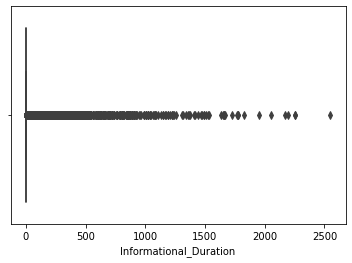

In [ ]:
sns.boxplot(x = df['Informational_Duration'])

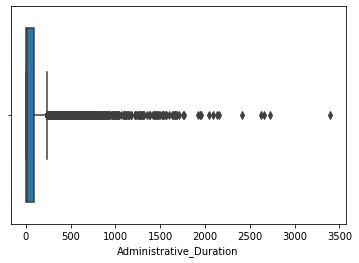

In [ ]:
sns.boxplot(x = df['Administrative_Duration'])

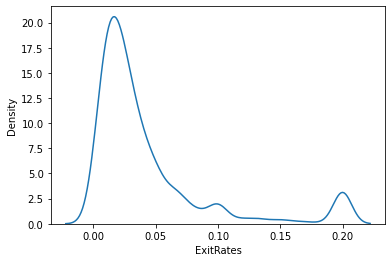

In [ ]:
sns.kdeplot(x = df['ExitRates'])

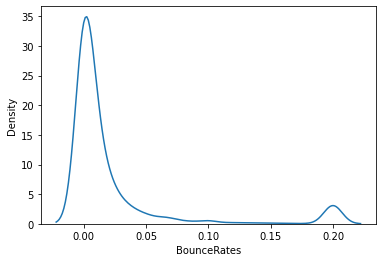

In [ ]:
sns.kdeplot(x = df['BounceRates'])

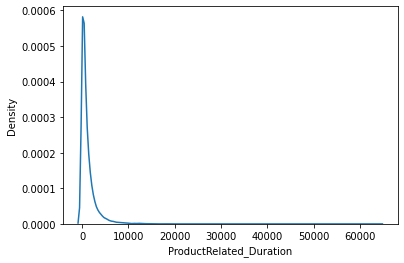

In [ ]:
sns.kdeplot(x = df['ProductRelated_Duration'])

이상치 생성

In [ ]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print(column + '열의 총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')
    
outlier_iqr(df, 'Administrative_Duration')

IQR은 93.25625 이다.
lower bound 값은 -139.88437499999998 이다.
upper bound 값은 233.14062499999997 이다.
Administrative_Duration열의 총 이상치 개수는 1172 이다.


In [ ]:
outlier_iqr(df, 'Informational_Duration')

IQR은 0.0 이다.
lower bound 값은 0.0 이다.
upper bound 값은 0.0 이다.
Informational_Duration열의 총 이상치 개수는 2405 이다.


In [ ]:
outlier_iqr(df, 'ProductRelated_Duration')

IQR은 1280.0197135 이다.
lower bound 값은 -1735.8920702500002 이다.
upper bound 값은 3384.1867837500004 이다.
ProductRelated_Duration열의 총 이상치 개수는 961 이다.


In [ ]:
outlier_iqr(df, 'BounceRates')

IQR은 0.016812558499999998 이다.
lower bound 값은 -0.025218837749999997 이다.
upper bound 값은 0.04203139624999999 이다.
BounceRates열의 총 이상치 개수는 1551 이다.


In [ ]:
outlier_iqr(df, 'ExitRates')

IQR은 0.035714286000000005 이다.
lower bound 값은 -0.039285715000000006 이다.
upper bound 값은 0.103571429 이다.
ExitRates열의 총 이상치 개수는 1099 이다.


In [ ]:
outlier_iqr(df, 'PageValues')

IQR은 0.0 이다.
lower bound 값은 0.0 이다.
upper bound 값은 0.0 이다.
PageValues열의 총 이상치 개수는 2730 이다.


이상치 추가

In [ ]:
import random 

random.seed(2022)

sample = [x for x in range(len(df) + 1)]
Admini_dur_outindex = random.sample(sample, int(np.round(len(df) * 0.03)))
BounceRate_outindex = random.sample(sample, int(np.round(len(df) * 0.03)))
PR_dur_outindex = random.sample(sample, int(np.round(len(df) * 0.03)))

In [ ]:
Admini_dur_outindex = np.array(Admini_dur_outindex)
BounceRate_outindex = np.array(BounceRate_outindex)
PR_dur_outindex = np.array(PR_dur_outindex)

In [ ]:
Admini_dur_outindex

array([ 8710,  4733,  7251,  8941,  5079,  9598,   995,  8489, 11330,
       11555,  6756, 11223, 10388,  5132,   200,  7067,  5056, 10587,
       10243,  7469,  9005,  8512,  9288,   622, 12206,  4340,   649,
        6028,  4723,  6643,  1094,  6832,  4348,  7232,  2748,   229,
         841,  3754, 11026,  7914,  6891,  1149, 11144,  1876, 11076,
        1741,  9201,  6385, 10333,  7414,  4528,   515,  8826, 10358,
        5280,  7157,  4199,    58,  7078,  2191,   457, 11474, 12188,
         431,  6904, 11126, 11459, 12054,  5277,  8844,  6922,  4623,
        1520,  1745,  9430,  3000,  1651,  6772,  6550,  7332,  9243,
        2082, 11616,  4427, 10088,  7121,  2614,  1704,  3191,  2145,
        1177,  7632,  2080,  6559,  1625,  2706,  8896, 11722, 10168,
         998,  7101,  2167, 12191, 12278, 10719,  5942,  3375,  6078,
        8960, 11746,  5429,  4321,  5157, 10485,  8192,  1666,  7613,
        8138, 10944,  6545,  6683,  6354, 10327,  3513,  8843,  7250,
        8147,  3595,

In [ ]:
df.loc[Admini_dur_outindex, 'Administrative_Duration'] = random.uniform(240, 3000)
df.loc[BounceRate_outindex, 'BounceRates'] = random.uniform(0.06, 0.19)
df.loc[PR_dur_outindex, 'ProductRelated_Duration'] = random.uniform(4000, 60000)

In [ ]:
df.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,1065.140994,0,0.0,1,0.000000,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.0,2,64.000000,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.0,1,18173.594362,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


In [ ]:
df.to_csv('/content/drive/MyDrive/dt_data.csv')

In [ ]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [ ]:
df['Weekend'].unique()

array([False,  True])

In [ ]:
df['Revenue'].unique()

array([False,  True])

In [ ]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [ ]:
type(df['Revenue'][0])

numpy.bool_

In [ ]:
Revenue_map = {False : 0, True : 1}
df['Revenue'] = df['Revenue'].map(Revenue_map)

각종 데이터 시각화

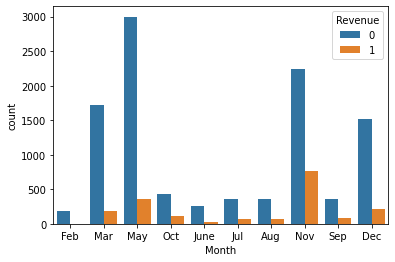

In [ ]:
sns.countplot(x = "Month", hue = "Revenue", data = df)

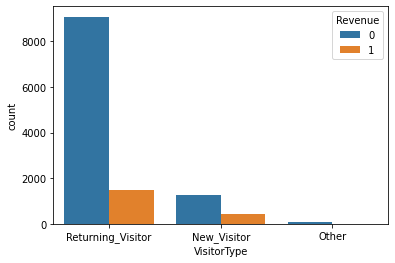

In [ ]:
sns.countplot(x = "VisitorType", hue = "Revenue", data = df)

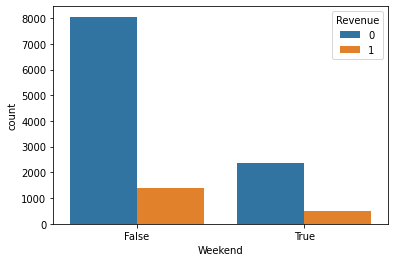

In [ ]:
sns.countplot(x = "Weekend", hue = "Revenue", data = df)

범주형 변수 인코딩

In [ ]:
weekend_map = {False : 0, True : 1}
visitor_map = {'Other' : 0, 'Returning_Visitor' : 1, 'New_Visitor' : 2}
month_map = {'Feb' : 0, 'Mar' : 0, 'May' : 1, 'June' : 1, 'Jul' : 2, 'Aug' : 2, 'Sep' : 2, 'Oct' : 3, 'Nov' : 3, 'Dec' : 3}

df['Weekend'] = df['Weekend'].map(weekend_map)
df['VisitorType'] = df['VisitorType'].map(visitor_map)
df['Month'] = df['Month'].map(month_map)

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,1065.140994,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,1,1,1,1,1,0,0
1,0,0.000000,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,2,2,1,2,1,0,0
2,0,0.000000,0,0.0,1,18173.594362,0.20,0.20,0.0,0.0,0,4,1,9,3,1,0,0
3,0,0.000000,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,3,2,2,4,1,0,0
4,0,0.000000,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,0,3,3,1,4,1,1,0


모델 구축 => 의사결정나무 구축

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

X_data = df.drop('Revenue', axis = 1)
y_data = df['Revenue']


학습 / 테스트 데이터 분리

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X_data, y_data, test_size = 0.25, stratify = y_data, random_state = 2022)
X_train.shape, X_test.shape, y_train.shape, y_data.shape

((9247, 17), (3083, 17), (9247,), (12330,))

In [ ]:
dt_clf = DecisionTreeClassifier(random_state = 2022)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

결정 트리 가시화

In [ ]:
export_graphviz(dt_clf, out_file="tree.dot", class_names = ['False', 'True'], feature_names = np.array(X_data.columns.tolist()), impurity=True, filled=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


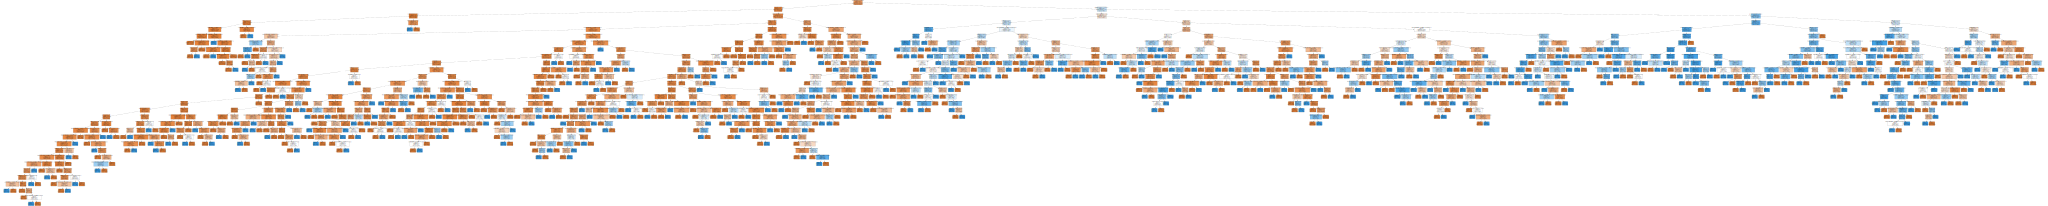

In [ ]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

모델 성능 평가

In [ ]:
#stratify 첨가
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
y_pred = dt_clf.predict(X_test)

print("Train_Accuracy : ", dt_clf.score(X_train, y_train), '\n')
print("Test_Accuracy : ", dt_clf.score(X_test, y_test), '\n')
print('Confusion Matrix:','\n', confusion_matrix(y_test, y_pred))

print('Accuracy of prediction : ', np.round(accuracy_score(y_test, y_pred), 3))
print('Recall of prediction: ', np.round(recall_score(y_test, y_pred), 3))
print('Precision of prediction : ', np.round(precision_score(y_test ,y_pred), 3))
print('F1_score: ', np.round(f1_score(y_test, y_pred), 3))


Train_Accuracy :  1.0 

Test_Accuracy :  0.8602011028219267 

Confusion Matrix: 
 [[2369  237]
 [ 194  283]]
Accuracy of prediction :  0.86
Recall of prediction:  0.593
Precision of prediction :  0.544
F1_score:  0.568


In [ ]:
dt_pred_proba = dt_clf.predict_proba(X_test)
dt_pred = dt_clf.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(dt_pred_proba.shape))
print('pred_proba array에서 앞 5개만 샘플로 추출 \n', dt_pred_proba[:5])

pred_proba_result = np.concatenate([dt_pred_proba, dt_pred.reshape(-1, 1)], axis = 1)
print(pred_proba_result)

dt_pred_df = pd.DataFrame(pred_proba_result, columns = ['prediction 0', 'prediction 1', 'predict'])
dt_pred_df.head(10)

Confusion Matrix: 
 [[2453  153]
 [ 179  298]]
Accuracy of prediction :  0.892
Recall of prediction:  0.625
Precision of prediction :  0.661
F1_score:  0.642
pred_proba() 결과 Shape : (3083, 2)
pred_proba array에서 앞 5개만 샘플로 추출 
 [[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


,prediction 0,prediction 1,predict
0,0.0,1.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


교차 검증

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

scores = cross_val_score(dt_clf, X_data, y_data, scoring = 'accuracy', cv = 5)

print('Averaged results of cross validation: ', scores.mean())
scores

Averaged results of cross validation:  0.8462287104622872


array([0.90997567, 0.88280616, 0.83292782, 0.80332522, 0.80210868])

성능 평가 함수

In [ ]:
def get_clf_eval(y_test, y_pred):
    print('Confusion Matrix:','\n', confusion_matrix(y_test, y_pred))

    print('Accuracy of prediction : ', np.round(accuracy_score(y_test, y_pred), 3))
    print('Recall of prediction: ', np.round(recall_score(y_test, y_pred), 3))
    print('Precision of prediction : ', np.round(precision_score(y_test ,y_pred), 3))
    print('F1_score: ', np.round(f1_score(y_test, y_pred), 3))
    print('ROC AUC score: ', np.round(roc_auc_score(y_test, y_pred), 3))

가지치기 수행

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pruned_dt_clf = DecisionTreeClassifier(max_depth = 4, random_state = 156)
pruned_dt_clf.fit(X_train, y_train)

y_pred = pruned_dt_clf.predict(X_test)
get_clf_eval(y_test, y_pred)

Confusion Matrix: 
 [[2477  129]
 [ 210  267]]
Accuracy of prediction :  0.89
Recall of prediction:  0.56
Precision of prediction :  0.674
F1_score:  0.612
ROC AUC score:  0.755


In [ ]:
pruned_dt_clf_predict_proba = pruned_dt_clf.predict_proba(X_test)
pruned_dt_pred = pruned_dt_clf.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pruned_dt_clf_predict_proba.shape))
print('pred_proba array에서 앞 5개만 샘플로 추출 \n', pruned_dt_clf_predict_proba[:5])

pred_proba_result = np.concatenate([pruned_dt_clf_predict_proba, pruned_dt_pred.reshape(-1, 1)], axis = 1)
print(pred_proba_result)

dt_pred_df = pd.DataFrame(pred_proba_result, columns = ['prediction 0', 'prediction 1', 'predict'])
dt_pred_df.tail(10)

pred_proba() 결과 Shape : (3083, 2)
pred_proba array에서 앞 5개만 샘플로 추출 
 [[0.10933333 0.89066667]
 [0.92872265 0.07127735]
 [0.99884024 0.00115976]
 [0.93650794 0.06349206]
 [0.38362069 0.61637931]]
[[0.10933333 0.89066667 1.        ]
 [0.92872265 0.07127735 0.        ]
 [0.99884024 0.00115976 0.        ]
 ...
 [0.38362069 0.61637931 1.        ]
 [0.99884024 0.00115976 0.        ]
 [0.92872265 0.07127735 0.        ]]


,prediction 0,prediction 1,predict
3073,0.714646,0.285354,0.0
3074,0.998840,0.001160,0.0
3075,0.928723,0.071277,0.0
3076,0.928723,0.071277,0.0
3077,0.714646,0.285354,0.0
3078,0.998840,0.001160,0.0
3079,0.109333,0.890667,1.0
3080,0.383621,0.616379,1.0
3081,0.998840,0.001160,0.0
3082,0.928723,0.071277,0.0


임계점 조절

In [ ]:
from sklearn.preprocessing import Binarizer
custom_threshold = 0.5
pred_proba_1 = pruned_dt_clf_predict_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

Confusion Matrix: 
 [[2477  129]
 [ 210  267]]
Accuracy of prediction :  0.89
Recall of prediction:  0.56
Precision of prediction :  0.674
F1_score:  0.612
ROC AUC score:  0.755


In [ ]:
from sklearn.preprocessing import Binarizer
custom_threshold = 0.6
pred_proba_1 = pruned_dt_clf_predict_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

Confusion Matrix: 
 [[2526   80]
 [ 256  221]]
Accuracy of prediction :  0.891
Recall of prediction:  0.463
Precision of prediction :  0.734
F1_score:  0.568
ROC AUC score:  0.716


In [ ]:
dt_pred = dt_clf.predict(X_test)
pruned_dt_pred = pruned_dt_clf.predict(X_test)
dt_pred_roc_score = roc_auc_score(y_test, dt_pred)
pruned_dt_roc_score = roc_auc_score(y_test, pruned_dt_pred)
print('가지치기를 적용하지 않은 ROC AUC 값 : {0:.4f}'.format(dt_pred_roc_score))
print('가지치기를 적용한 ROC AUC 값 : {0:.4f}'.format(pruned_dt_roc_score))

가지치기를 적용하지 않은 ROC AUC 값 : 0.7512
가지치기를 적용한 ROC AUC 값 : 0.7551


In [ ]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_thresholds in thresholds:
        binarizer = Binarizer(threshold = custom_thresholds).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        get_clf_eval(y_test, custom_predict)

thresholds = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

Confusion Matrix: 
 [[2390  216]
 [ 131  346]]
Accuracy of prediction :  0.887
Recall of prediction:  0.725
Precision of prediction :  0.616
F1_score:  0.666
ROC AUC score:  0.821
Confusion Matrix: 
 [[2422  184]
 [ 154  323]]
Accuracy of prediction :  0.89
Recall of prediction:  0.677
Precision of prediction :  0.637
F1_score:  0.657
ROC AUC score:  0.803
Confusion Matrix: 
 [[2453  153]
 [ 174  303]]
Accuracy of prediction :  0.894
Recall of prediction:  0.635
Precision of prediction :  0.664
F1_score:  0.65
ROC AUC score:  0.788
Confusion Matrix: 
 [[2453  153]
 [ 174  303]]
Accuracy of prediction :  0.894
Recall of prediction:  0.635
Precision of prediction :  0.664
F1_score:  0.65
ROC AUC score:  0.788
Confusion Matrix: 
 [[2454  152]
 [ 178  299]]
Accuracy of prediction :  0.893
Recall of prediction:  0.627
Precision of prediction :  0.663
F1_score:  0.644
ROC AUC score:  0.784
Confusion Matrix: 
 [[2458  148]
 [ 183  294]]
Accuracy of prediction :  0.893
Recall of prediction:  0

In [ ]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그린다.
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
    
    # FPR X축의 Scale을 0.1단위로 변경, X, Y축 명 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.fill_between(fprs, tprs)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

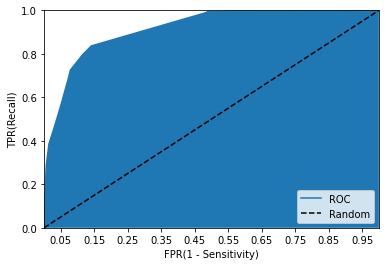

In [ ]:
roc_curve_plot(y_test, pruned_dt_clf.predict_proba(X_test)[:, 1])

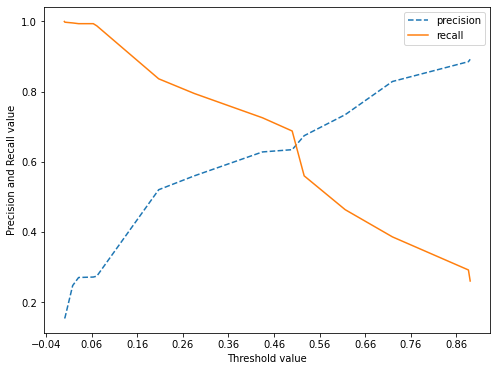

In [ ]:
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축은 임계값, y축은 정밀도, 재현율
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    # threshold 값 x축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    #x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.show()
    
precision_recall_curve_plot(y_test, pruned_dt_clf.predict_proba(X_test)[:, 1])

In [ ]:
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = ["False", "True"], feature_names = np.array(X_data.columns.tolist()), impurity=True, filled=True)

[ max_depth가 6인 경우의 Decision Tree 시각화 ]


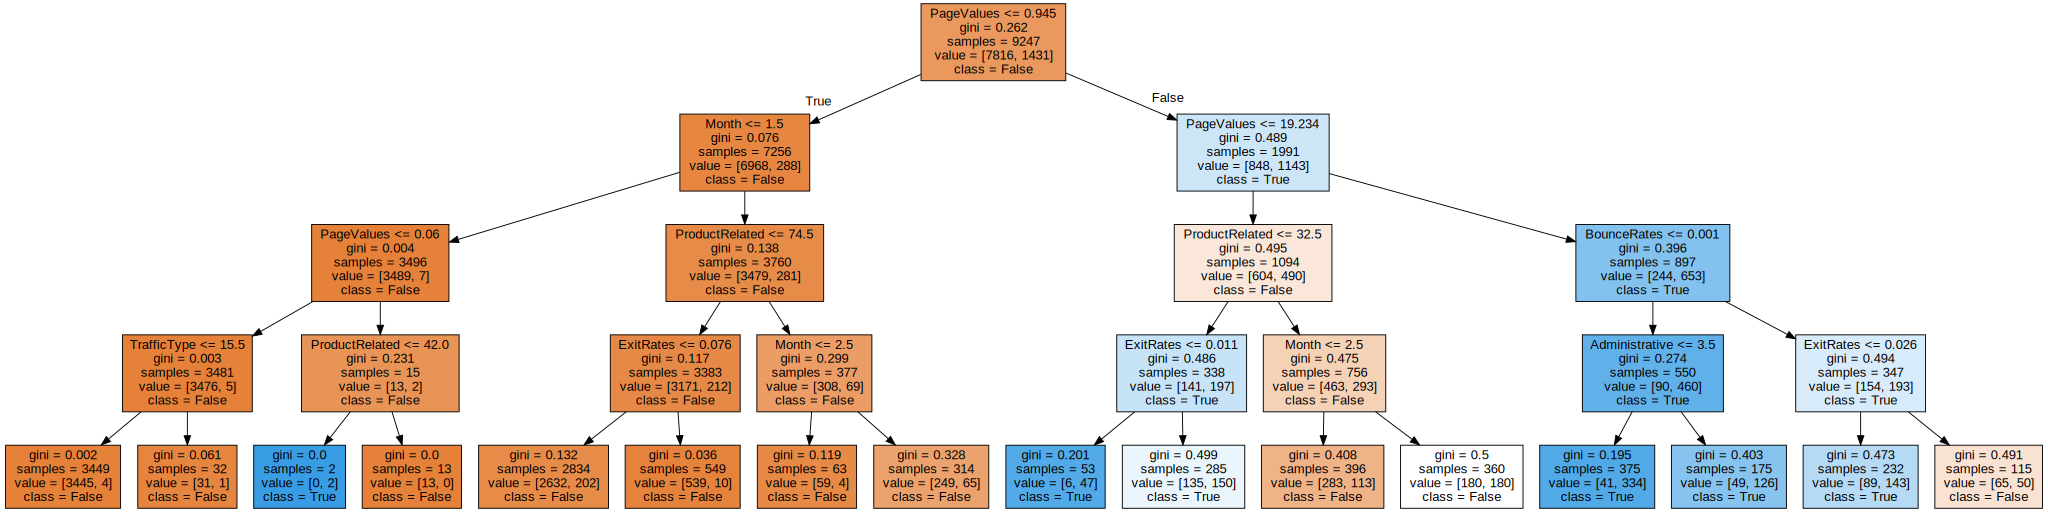

In [ ]:
print('[ max_depth가 6인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
pruned_dt_clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 64, min_samples_leaf = 16, random_state = 156)
pruned_dt_clf.fit(X_train, y_train)

y_pred = pruned_dt_clf.predict(X_test)
get_clf_eval(y_test, y_pred)

Confusion Matrix: 
 [[2458  148]
 [ 176  301]]
Accuracy of prediction :  0.895
Recall of prediction:  0.631
Precision of prediction :  0.67
F1_score:  0.65
ROC AUC score:  0.787


In [ ]:
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = ["False", "True"], feature_names = np.array(X_data.columns.tolist()), impurity=True, filled=True)

[ max_depth가 8, min_samples_split이 64, min_samples_leaf가 16인 경우의 Decision Tree 시각화 ]


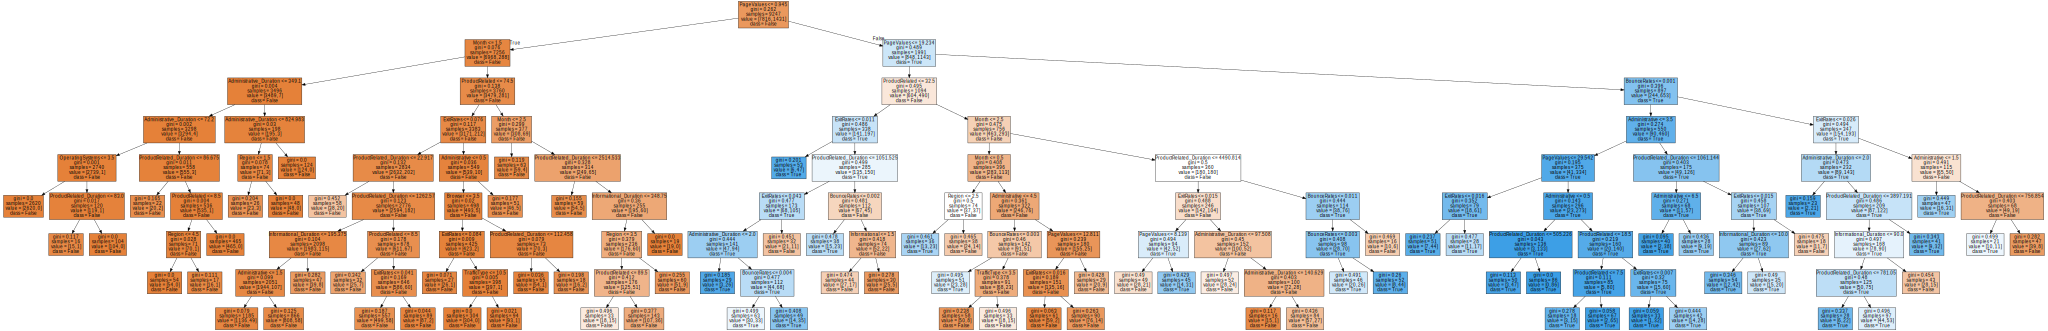

In [ ]:
print('[ max_depth가 8, min_samples_split이 64, min_samples_leaf가 16인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

하이퍼 파라미터 정하기

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'splitter' : ['best', 'random'], 'max_depth' : [2, 4, 8, 12, 16], 'min_samples_split' : [16, 32, 48, 64, 96], 'min_samples_leaf' : [4, 8, 16, 32, 64]}

dt_clf = DecisionTreeClassifier(random_state = 156)
grid_dclf = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV의 최적의 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV의 최고 정확도 : ', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(X_test)

print('Confusion Matrix:','\n', confusion_matrix(y_test, y_pred))

print('Accuracy of prediction : ', np.round(accuracy_score(y_test, dpredictions), 3))
print('Recall of prediction: ', np.round(recall_score(y_test, dpredictions), 3))
print('Precision of prediction : ', np.round(precision_score(y_test ,dpredictions), 3))
print('F1_score: ', np.round(f1_score(y_test, dpredictions), 3))

GridSearchCV의 최적의 파라미터 :  {'max_depth': 16, 'min_samples_leaf': 16, 'min_samples_split': 48, 'splitter': 'random'}
GridSearchCV의 최고 정확도 :  0.8949924137225382
Confusion Matrix: 
 [[2461  145]
 [ 180  297]]
Accuracy of prediction :  0.881
Recall of prediction:  0.509
Precision of prediction :  0.645
F1_score:  0.569


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'splitter' : ['best', 'random'], 'max_depth' : [2, 4, 8, 12, 16], 'min_samples_split' : [16, 32, 48, 64, 96], 'min_samples_leaf' : [4, 8, 16, 32, 64]}

dt_clf = DecisionTreeClassifier(random_state = 156)
grid_dclf = GridSearchCV(dt_clf, param_grid = params, scoring = make_scorer(f1_score , average='macro'), cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV의 최적의 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV의 최고 정확도 : ', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(X_test)

print('Confusion Matrix:','\n', confusion_matrix(y_test, dpredictions))

print('Accuracy of prediction : ', np.round(accuracy_score(y_test, dpredictions), 3))
print('Recall of prediction: ', np.round(recall_score(y_test, dpredictions), 3))
print('Precision of prediction : ', np.round(precision_score(y_test ,dpredictions), 3))
print('F1_score: ', np.round(f1_score(y_test, dpredictions), 3))

GridSearchCV의 최적의 파라미터 :  {'max_depth': 4, 'min_samples_leaf': 64, 'min_samples_split': 16, 'splitter': 'best'}
GridSearchCV의 최고 정확도 :  0.7864163767355705
Confusion Matrix: 
 [[2477  129]
 [ 210  267]]
Accuracy of prediction :  0.89
Recall of prediction:  0.56
Precision of prediction :  0.674
F1_score:  0.612


In [ ]:
cv_results_df = pd.DataFrame(grid_dclf.cv_results_['params'])
cv_results_df['mean_test_score'] = grid_dclf.cv_results_['mean_test_score']
cv_results_df.sort_values(by = 'mean_test_score', ascending = False)

,max_depth,min_samples_leaf,min_samples_split,splitter,mean_test_score
98,4,64,96,best,0.786416
96,4,64,64,best,0.786416
94,4,64,48,best,0.786416
92,4,64,32,best,0.786416
90,4,64,16,best,0.786416
...,...,...,...,...,...
31,2,32,16,random,0.479119
21,2,16,16,random,0.479119
29,2,16,96,random,0.479119
23,2,16,32,random,0.479119


In [ ]:
dt_clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 64, min_samples_split = 16, splitter = 'best')
dt_clf.fit(X_train, y_train)

pred_proba = dt_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds = [0.35, 0.4, 0.45])

Confusion Matrix: 
 [[2401  205]
 [ 131  346]]
Accuracy of prediction :  0.891
Recall of prediction:  0.725
Precision of prediction :  0.628
F1_score:  0.673
ROC AUC score:  0.823
Confusion Matrix: 
 [[2401  205]
 [ 131  346]]
Accuracy of prediction :  0.891
Recall of prediction:  0.725
Precision of prediction :  0.628
F1_score:  0.673
ROC AUC score:  0.823
Confusion Matrix: 
 [[2417  189]
 [ 149  328]]
Accuracy of prediction :  0.89
Recall of prediction:  0.688
Precision of prediction :  0.634
F1_score:  0.66
ROC AUC score:  0.808


In [ ]:
dt_clf = DecisionTreeClassifier(max_depth = 16, min_samples_leaf = 16, min_samples_split = 48,  splitter = 'random')
dt_clf.fit(X_train, y_train)

pred_proba = dt_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds = [0.35])

Confusion Matrix: 
 [[2415  191]
 [ 138  339]]
Accuracy of prediction :  0.893
Recall of prediction:  0.711
Precision of prediction :  0.64
F1_score:  0.673
ROC AUC score:  0.819


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'min_samples_split' : [4, 8, 12, 24, 48]}

dt_clf = DecisionTreeClassifier(random_state = 156)
grid_dclf = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV의 최적의 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV의 최고 정확도 : ', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(X_test)

print('Confusion Matrix:','\n', confusion_matrix(y_test, y_pred))

print('Accuracy of prediction : ', np.round(accuracy_score(y_test, y_pred), 3))
print('Recall of prediction: ', np.round(recall_score(y_test, y_pred), 3))
print('Precision of prediction : ', np.round(precision_score(y_test ,y_pred), 3))
print('F1_score: ', np.round(f1_score(y_test, y_pred), 3))

GridSearchCV의 최적의 파라미터 :  {'min_samples_split': 48}
GridSearchCV의 최고 정확도 :  0.8800684080511015
Confusion Matrix: 
 [[2532   77]
 [ 266  208]]
Accuracy of prediction :  0.889
Recall of prediction:  0.439
Precision of prediction :  0.73
F1_score:  0.548


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf' : [4, 8, 12, 24, 48]}

dt_clf = DecisionTreeClassifier(random_state = 156)
grid_dclf = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV의 최적의 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV의 최고 정확도 : ', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(X_test)

print('Confusion Matrix:','\n', confusion_matrix(y_test, y_pred))

print('Accuracy of prediction : ', np.round(accuracy_score(y_test, y_pred), 3))
print('Recall of prediction: ', np.round(recall_score(y_test, y_pred), 3))
print('Precision of prediction : ', np.round(precision_score(y_test ,y_pred), 3))
print('F1_score: ', np.round(f1_score(y_test, y_pred), 3))

GridSearchCV의 최적의 파라미터 :  {'min_samples_leaf': 48}
GridSearchCV의 최고 정확도 :  0.8918551737242921
Confusion Matrix: 
 [[2532   77]
 [ 266  208]]
Accuracy of prediction :  0.889
Recall of prediction:  0.439
Precision of prediction :  0.73
F1_score:  0.548


In [ ]:
dt_clf = DecisionTreeClassifier(max_depth = 16, min_samples_split = 16, min_samples_leaf = 48, splitter = 'random', random_state = 156)
dt_clf.fit(X_train, y_train)

pred_proba = dt_clf.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds = [0.35])

Confusion Matrix: 
 [[2432  174]
 [ 155  322]]
Accuracy of prediction :  0.893
Recall of prediction:  0.675
Precision of prediction :  0.649
F1_score:  0.662
ROC AUC score:  0.804


각 변수의 중요도 찾기

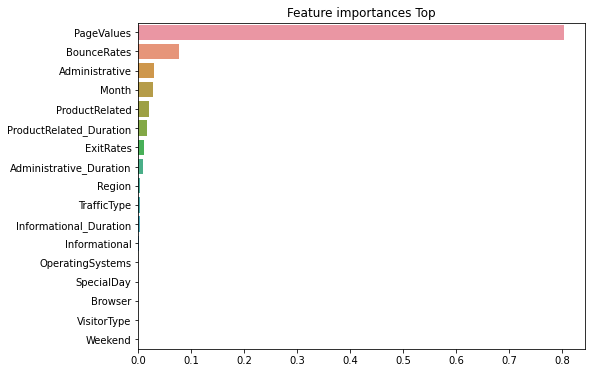

In [ ]:
dt_importance_values = dt_clf.feature_importances_
dt_importances = pd.Series(dt_importance_values, index=X_train.columns)
dt_top = dt_importances.sort_values(ascending = False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top')
sns.barplot(x=dt_top, y=dt_top.index)
plt.show()

In [ ]:
X_data = X_data[['PageValues', 'BounceRates', 'Administrative', 'Month', 'ProductRelated', 'ProductRelated_Duration', 'ExitRates', 'Administrative_Duration']]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.25, stratify = y_data, random_state = 156)
dt_clf = DecisionTreeClassifier(max_depth = 16, min_samples_split = 16, min_samples_leaf = 48, random_state = 156)
dt_clf.fit(X_train, y_train)

pred_proba = dt_clf.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds = [0.35])

Confusion Matrix: 
 [[2401  205]
 [ 142  335]]
Accuracy of prediction :  0.887
Recall of prediction:  0.702
Precision of prediction :  0.62
F1_score:  0.659
ROC AUC score:  0.812


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.25, stratify = y_data, random_state = 156)
rf_clf = RandomForestClassifier(random_state = 156)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print('Confusion Matrix:','\n', confusion_matrix(y_test, y_pred))

print('Accuracy of prediction : ', np.round(accuracy_score(y_test, y_pred), 3))
print('Recall of prediction: ', np.round(recall_score(y_test, y_pred), 3))
print('Precision of prediction : ', np.round(precision_score(y_test ,y_pred), 3))
print('F1_score: ', np.round(f1_score(y_test, y_pred), 3))

scores = cross_val_score(dt_clf, X_data, y_data, cv = 5)
scores

Confusion Matrix: 
 [[2503  103]
 [ 209  268]]
Accuracy of prediction :  0.899
Recall of prediction:  0.562
Precision of prediction :  0.722
F1_score:  0.632


array([0.91038118, 0.90510949, 0.88483374, 0.87145174, 0.87145174])

In [ ]:
params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [12, 24, 36, 48, 60],
    'min_samples_split' : [16, 32, 48, 64]
}

grid_rfclf = GridSearchCV(rf_clf, param_grid = params, scoring = 'accuracy', cv = 5)
grid_rfclf.fit(X_train, y_train)

print('GridSearchCV의 최적의 파라미터 : ', grid_rfclf.best_params_)
print('GridSearchCV의 최고 정확도 : ', grid_rfclf.best_score_)

best_rfclf = grid_rfclf.best_estimator_
dpredictions = best_rfclf.predict(X_test)

print('Confusion Matrix:','\n', confusion_matrix(y_test, y_pred))

print('Accuracy of prediction : ', np.round(accuracy_score(y_test, y_pred), 3))
print('Recall of prediction: ', np.round(recall_score(y_test, y_pred), 3))
print('Precision of prediction : ', np.round(precision_score(y_test ,y_pred), 3))
print('F1_score: ', np.round(f1_score(y_test, y_pred), 3))

GridSearchCV의 최적의 파라미터 :  {'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 32, 'n_estimators': 100}
GridSearchCV의 최고 정확도 :  0.9016986245304256
Confusion Matrix: 
 [[2503  103]
 [ 209  268]]
Accuracy of prediction :  0.899
Recall of prediction:  0.562
Precision of prediction :  0.722
F1_score:  0.632
